In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping tools
import requests
from bs4 import BeautifulSoup

# Regular expressions for pattern matching and text extraction
import re

In [2]:
# Generating a list of Amazon laptop search URLs by looping through combinations of page and reference numbers for scraping multiple result pages.

urls = []

for i in range(1, 21):  # i = 1, 2, 3
    for j in range(1, 21):  # j = 1, 2, 3
        url = f"https://www.amazon.in/s?k=laptops&page={i}&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_{j}"
        urls.append(url)

In [3]:
# Set custom headers to mimic a real browser and avoid request blocking during web scraping.

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    }

In [4]:
# Send an HTTP GET request to the first Amazon URL using custom headers to retrieve the HTML content for scraping.

requests.get(urls[0],headers=headers)

<Response [200]>

In [5]:
# Initialize empty lists to store extracted laptop specifications and metadata for each product scraped from Amazon.

laptop_info=[]
new_info=[]
laptop_name=[]
model_name=[]
laptop_gen=[]
ram=[]
rom=[]
color=[]
weight_in_kg=[]
core=[]
price=[]
rating=[]
display=[]
os=[]



#### Web Scraping

##### Scraping laptops data from the amazon website

In [6]:
"""Loop through each Amazon laptop search URL, send a GET request, parse the HTML content,and extract structured product details such as brand, model, generation, RAM, storage, color,
weight, processor, display size, operating system, review count, price, and rating using regex and HTML tags."""

for link in urls:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36",
        "Accept-Language": "en-US,en;q=0.9",
    }

    response = requests.get(link, headers=headers)
    data = BeautifulSoup(response.content, "html.parser")

    for i in data.find_all("div", class_="sg-col-inner"):
        a = i.find("h2")
        if a and a.has_attr("aria-label"):
            product_name = a["aria-label"].replace("Sponsored Ad - ", "").strip()
            laptop_info.append(product_name)

            # Brand name
            name = re.findall(r'^(?P<brand>[A-Z][A-Za-z&®™\-]{1,20})', product_name)
            
            laptop_name.append(name[0] if name else np.nan)

            # Model name
            
            model = re.findall(r'^(?:Sponsored Ad - )?[A-Z][a-zA-Z&®™\-]{2,20}\s+((?:[A-Za-z0-9\-]+(?:\s+|$)){1,4})',product_name)
           
            model_name.append(model[0] if model else np.nan)

            # Generation
            gen = re.findall(r'\b\d{1,2}(?:st|nd|rd|th)\s+Gen\b', product_name, re.IGNORECASE)
            
            laptop_gen.append(gen[0] if gen else np.nan)

            # RAM
            ram_ = re.findall(r'(\d+\s*GB\s*(?:RAM|LPDDR\d|DDR\d)?)', product_name)
            
            ram.append(ram_[0] if ram_ else np.nan)

            # ROM
            rom_ = re.findall(r'(\d+\s*GB\s*(?:SSD|eMMC|HDD))', product_name)
            
            rom.append(rom_[0] if rom_ else np.nan)

            # Color
            color_ = re.findall(r'\b(Black|White|Silver|Grey|Gray|Blue|Gold|Green|Red|Pink|Purple|Brown|Beige|Yellow|Orange)\b', product_name)
            
            color.append(color_[0] if color_ else np.nan)

            # Weight
            weight = re.findall(r'(\d+(?:\.\d+)?)\s*(?:kg|KG)', product_name)
           
            weight_in_kg.append(weight[0] if weight else np.nan)

            # Processor/Core
            # core_ = re.findall(r'(Intel\s+Core\s+i\d|AMD\s+Ryzen\s+\d|Intel\s+Celeron|AMD\s+Athlon(?:\s+Silver)?)', product_name)
            core_ = re.findall(r'(Intel\s+(?:Core\s+i\d{1,2}|Celeron|Pentium|Ultra\s+\d{1,3})|AMD\s+(?:Ryzen\s+\d{1,2}|Athlon(?:\s+Silver)?|Radeon)|MediaTek\s+Helio\s+\w+)', product_name, re.IGNORECASE)
            core.append(core_[0] if core_ else np.nan)
            # Display Size
            display_ = re.findall(r'(\d{1,2}\.?\d{0,2})\s*(?:\"|inch|inches|cm)', product_name, re.IGNORECASE)
            display.append(display_[0] if display_ else np.nan)
           

            #os
            os_ = re.findall(r'(Windows\s+\d{1,2}(?:\s+Home|Pro)?|Chrome\s+OS|Android\s+\d{1,2})', product_name, re.IGNORECASE)
            os.append(os_[0] if os_ else np.nan)

    
            # Price
            c = i.find("span", class_="a-price-whole")
            value = f"{c.text.strip()}" if c else np.nan
            price.append(value)

            # Rating
            d = i.find("span", class_="a-icon-alt")
            if d:
                r_value = re.findall(r"\d\.\d", d.text)
                rating.append(r_value[0] if r_value else np.nan)
            else:
                rating.append(np.nan)

In [7]:
columns = [laptop_name,model_name,laptop_gen,ram,rom,color,weight_in_kg,core,price,rating,display,os]

# Checking the length of each column

for i in columns:
    print(len(i))

9236
9236
9236
9236
9236
9236
9236
9236
9236
9236
9236
9236


In [8]:
# Create a dictionary to organize all extracted laptop attributes into structured key-value pairs for DataFrame conversion

data={
    
    "Laptop_Name":laptop_name,
    "Model_Name":model_name,
    "Laptop_Gen":laptop_gen,
    "Ram":ram,
    "Rom":rom,
    "Color":color,
    "Weight_In_Kg":weight_in_kg,
    "Core":core,
    "Price":price,
    "Rating":rating,
    "Display_Size":display,
    "OS":os
    
}

In [9]:
# Convert the structured dictionary of laptop attributes into a pandas DataFrame for analysis and visualization
df1 = pd.DataFrame(data)

In [10]:
df1

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
1,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"41,990",3.7,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"35,000",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"26,990",4.1,15.6,Windows 11
4,HP,NaN,14th Gen,32 GB,512 GB SSD,Grey,1.4,NaN,"53,990",5.0,14.0,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
9231,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
9232,Lenovo,IdeaPad 1 AMD Ryzen,NaN,8GB RAM,512GB SSD,Grey,NaN,AMD Ryzen 5,"33,799",4.0,15.6,Windows 11 Home
9233,Primebook,2 Pro 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"17,990",4.6,NaN,Android 15
9234,Aropana,Vegan Leather Desk Mat,NaN,NaN,NaN,Blue,NaN,NaN,599,4.4,13.8,NaN


In [11]:
df1['Laptop_Name'].unique()

array(['Dell', 'HP', 'Lenovo', 'Primebook', 'TABLE', 'Walker', nan,
       'JioBook', 'ASUS', 'Ultimus', 'DELL', 'Acer', 'MSI', 'AS-IT-IS',
       'Samsung', 'Cable', 'Portronics', 'ULTIMUS', 'ProBlend', 'Chuwi',
       'Tygot', 'Sounce', 'ZEBRONICS', 'Dukaan', 'Model', 'Born',
       'Wembley', 'Logitech', 'Gizga', 'Apple', 'VRPRIME', 'Certified',
       'Microsoft', 'Artis', 'Geonix', 'Dyazo', 'OneAssist', 'PLIXIO',
       'ORIGBELIE', 'Ant', 'Tukzer', 'External', 'Maxelon', 'Acko',
       'HAMMONDS', 'Florican', 'Zebronics', 'Gooyo', 'STRIFF', 'Asus',
       'DailyObjects', 'Lapster', 'Hp', 'Storio', 'Lapcare', 'New',
       'Amkette', 'MegaStro®', 'Smart', 'KACA', 'CodersParadise',
       'Toyshine', 'ZORBES®', 'Anker', 'HUION', 'Tizum', 'Arctic',
       'Replacement', 'LAPCARE', 'Laptop', 'Intex', 'GIZGA', 'GadgetBite',
       'ToyMagic', 'SWAPKART', 'TP-LINK', 'BARROT', 'Ambrane',
       'BigPassport', 'CEZO', 'Ceptics', 'NISHTECH', 'Pack', 'CD',
       'Disney', 'Lemorele', 'FAC

In [12]:
valid_brands = [
    "Dell", "HP", "Lenovo", "Apple", "ASUS", "Acer", "MSI", "Samsung", "Microsoft",
    "Chuwi", "Primebook", "JioBook", "Ultimus", "LG", "Huawei", "Honor", "Infinix",
    "Realme", "Redmi", "Nokia", "Vaio", "Razer", "Fujitsu", "Toshiba", "Smartron",
    "Panasonic", "iBall", "Notion Ink", "Jumper", "Avita"
]

df2 = df1[df1['Laptop_Name'].isin(valid_brands)]
df2.reset_index(drop=True, inplace=True)

In [13]:
df2

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
1,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"41,990",3.7,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"35,000",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"26,990",4.1,15.6,Windows 11
4,HP,NaN,14th Gen,32 GB,512 GB SSD,Grey,1.4,NaN,"53,990",5.0,14.0,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
4650,Chuwi,CoreBook X Laptop,NaN,8GB RAM,256GB SSD,Gray,NaN,Intel Core i3,"19,990",3.5,NaN,Windows 11
4651,Primebook,2 Max 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"19,990",NaN,NaN,Android 15
4652,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
4653,Lenovo,IdeaPad 1 AMD Ryzen,NaN,8GB RAM,512GB SSD,Grey,NaN,AMD Ryzen 5,"33,799",4.0,15.6,Windows 11 Home


In [14]:
# Save the extracted laptop data to a CSV file for future analysis or sharing
df2.to_csv("Extracted_Amazon_Laptop_Data_1.csv",index=False)

In [15]:
# Load the extracted Amazon laptop data from a CSV file into a pandas DataFrame for further analysis

df = pd.read_csv("Extracted_Amazon_Laptop_Data_1.csv")

In [16]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
1,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"41,990",3.7,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"35,000",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"26,990",4.1,15.6,Windows 11
4,HP,NaN,14th Gen,32 GB,512 GB SSD,Grey,1.40,NaN,"53,990",5.0,14.0,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
4650,Chuwi,CoreBook X Laptop,NaN,8GB RAM,256GB SSD,Gray,NaN,Intel Core i3,"19,990",3.5,NaN,Windows 11
4651,Primebook,2 Max 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"19,990",NaN,NaN,Android 15
4652,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
4653,Lenovo,IdeaPad 1 AMD Ryzen,NaN,8GB RAM,512GB SSD,Grey,NaN,AMD Ryzen 5,"33,799",4.0,15.6,Windows 11 Home


In [18]:
df.duplicated().sum()

np.int64(4436)

In [19]:
# Remove duplicate rows to ensure each laptop entry is unique

df.drop_duplicates(inplace=True)

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
1,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"41,990",3.7,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"35,000",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"26,990",4.1,15.6,Windows 11
4,HP,NaN,14th Gen,32 GB,512 GB SSD,Grey,1.40,NaN,"53,990",5.0,14.0,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
214,HP,NaN,13th Gen,8GB DDR4,512GB SSD,Silver,1.59,Intel Core i3,"34,990",3.9,NaN,NaN
215,Lenovo,Thinkbook 16 G6 AMD,NaN,16GB RAM,512GB SSD,Grey,NaN,AMD Ryzen 5,"47,000",4.1,16.0,Windows 11 Home
216,HP,NaN,13th Gen,6GB,512GB SSD,Silver,2.30,Intel Core i5,"69,990",3.8,39.6,NaN
217,Lenovo,ThinkPad E14 AMD Ryzen,NaN,16GB RAM,512GB SSD,Black,1.41,AMD Ryzen 5,"56,900",4.1,14.0,NaN


In [22]:
# Standardize brand names by stripping whitespace and converting to uppercase
df['Laptop_Name'] = df['Laptop_Name'].str.strip().str.upper()


In [23]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,DELL,NaN,13th Gen,16GB RAM,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
1,DELL,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"41,990",3.7,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"35,000",4.6,15.6,Windows 11
3,LENOVO,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"26,990",4.1,15.6,Windows 11
4,HP,NaN,14th Gen,32 GB,512 GB SSD,Grey,1.40,NaN,"53,990",5.0,14.0,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
214,HP,NaN,13th Gen,8GB DDR4,512GB SSD,Silver,1.59,Intel Core i3,"34,990",3.9,NaN,NaN
215,LENOVO,Thinkbook 16 G6 AMD,NaN,16GB RAM,512GB SSD,Grey,NaN,AMD Ryzen 5,"47,000",4.1,16.0,Windows 11 Home
216,HP,NaN,13th Gen,6GB,512GB SSD,Silver,2.30,Intel Core i5,"69,990",3.8,39.6,NaN
217,LENOVO,ThinkPad E14 AMD Ryzen,NaN,16GB RAM,512GB SSD,Black,1.41,AMD Ryzen 5,"56,900",4.1,14.0,NaN


In [30]:
df['Ram'].unique()

array(['16 GB', '8 GB', '32 GB', '6 GB', '4 GB', '12 GB', '24 GB', nan,
       '64GB'], dtype=object)

In [29]:
df['Ram'] = df['Ram'].replace({
    '8GB RAM': '8 GB',
    '16GB DDR4': '16 GB',
    '16GB RAM': '16 GB',
    '8GB LPDDR5': '8 GB',
    '6GB': '6 GB',
    '8GB DDR4': '8 GB',
    '8 GB RAM': '8 GB',
    '12GB DDR4': '12 GB',
    '16GB DDR5': '16 GB',
    '16GB LPDDR5': '16 GB',
    '16 GB': '16 GB',
    '4GB': '4 GB',
    '4GB ': '4 GB',
    '16GB': '16 GB',
    '32GB RAM': '32 GB',
    '4GB RAM': '4 GB',
    '8 GB': '8 GB',
    '16 GB LPDDR5': '16 GB',
    '6GB RAM': '6 GB',
    '6GB ': '6 GB',
    '6GB DDR6': '6 GB',
    '4 GB': '4 GB',
    '8GB': '8 GB',
    '24 GB': '24 GB',
    '32 GB': '32 GB',
    '8GB ': '8 GB',
    '12GB RAM': '12 GB',
    '8 GB LPDDR4': '8 GB',
    '16GB ': '16 GB',
    '24GB RAM': '24 GB',
    '32GB': '32 GB',
    '32 GB ': '32 GB',
    '24GB DDR4': '24 GB',
    '16 GB RAM': '16 GB',
    '12GB LPDDR4':'12 GB',
    '12 GB RAM':'12GB',
    '12GB':'12 GB'
})

In [33]:
df['Rom'].unique()

array([nan, '512 GB', '128 GB', '64 GB', '256 GB'], dtype=object)

In [32]:
df['Rom'] = df['Rom'].replace({
    '512GB SSD': '512 GB',
    '512 GB SSD': '512 GB',
    '64GB eMMC': '64 GB',
    '256 GB SSD': '256 GB',
    '128 GB SSD': '128 GB',
    '128GB eMMC': '128 GB',
    '256GB SSD': '256 GB',
    '512GB': '512 GB',
    '256GB': '256 GB',
    '128GB': '128 GB',
    '64GB': '64 GB'
})

In [34]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,DELL,NaN,13th Gen,16 GB,NaN,Silver,1.62,Intel Core i5,"61,490",3.8,15.6,Windows 11
1,DELL,NaN,13th Gen,16 GB,NaN,Grey,NaN,Intel Core i3,"41,990",3.7,15.6,Windows 11
2,HP,NaN,NaN,16 GB,512 GB,NaN,NaN,NaN,"35,000",4.6,15.6,Windows 11
3,LENOVO,V15 G4 AMD Athlon,NaN,8 GB,512 GB,Silver,NaN,AMD Athlon Silver,"26,990",4.1,15.6,Windows 11
4,HP,NaN,14th Gen,32 GB,512 GB,Grey,1.40,NaN,"53,990",5.0,14.0,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
214,HP,NaN,13th Gen,8 GB,512 GB,Silver,1.59,Intel Core i3,"34,990",3.9,NaN,NaN
215,LENOVO,Thinkbook 16 G6 AMD,NaN,16 GB,512 GB,Grey,NaN,AMD Ryzen 5,"47,000",4.1,16.0,Windows 11 Home
216,HP,NaN,13th Gen,6 GB,512 GB,Silver,2.30,Intel Core i5,"69,990",3.8,39.6,NaN
217,LENOVO,ThinkPad E14 AMD Ryzen,NaN,16 GB,512 GB,Black,1.41,AMD Ryzen 5,"56,900",4.1,14.0,NaN


In [35]:
# Remove commas from price strings
df['Price'] = df['Price'].str.replace(',', '')

# Convert cleaned strings to integers
df['Price'] = df['Price'].astype(float)

In [36]:
df.dtypes

Laptop_Name      object
Model_Name       object
Laptop_Gen       object
Ram              object
Rom              object
Color            object
Weight_In_Kg    float64
Core             object
Price           float64
Rating          float64
Display_Size    float64
OS               object
dtype: object

In [37]:
df['OS'] = df['OS'].replace({'Windows 11 Home':'Windows 11'})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop_Name   219 non-null    object 
 1   Model_Name    139 non-null    object 
 2   Laptop_Gen    87 non-null     object 
 3   Ram           189 non-null    object 
 4   Rom           143 non-null    object 
 5   Color         191 non-null    object 
 6   Weight_In_Kg  87 non-null     float64
 7   Core          146 non-null    object 
 8   Price         215 non-null    float64
 9   Rating        214 non-null    float64
 10  Display_Size  177 non-null    float64
 11  OS            134 non-null    object 
dtypes: float64(4), object(8)
memory usage: 20.7+ KB


In [39]:
df.isna().sum()

Laptop_Name       0
Model_Name       80
Laptop_Gen      132
Ram              30
Rom              76
Color            28
Weight_In_Kg    132
Core             73
Price             4
Rating            5
Display_Size     42
OS               85
dtype: int64

In [40]:
# Fill missing values in categorical columns using brand-wise mode.
# If a brand group has no non-null values, fallback to the global mode for that column.
mode_cols = ['Model_Name', 'Laptop_Gen', 'Ram', 'Rom', 'Color', 'Core', 'OS']
for col in mode_cols:
    global_mode = df[col].mode().dropna().iloc[0]
    df[col] = df.groupby('Laptop_Name')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else global_mode))

In [41]:
# Fill missing values in numeric columns using the mean value within each Brand Name group.
mean_cols = ['Weight_In_Kg', 'Rating', 'Display_Size']

for col in mean_cols:
    global_mean = df[col].mean()
    df[col] = df.groupby('Laptop_Name')[col].transform(
        lambda x: x.fillna(x.mean() if not pd.isna(x.mean()) else global_mean)
    )


In [42]:
df["Display_Size"] = df["Display_Size"].round(2)
df['Weight_In_Kg'] = df['Weight_In_Kg'].round(2)
df['Rating'] = df['Rating'].round(2)

In [55]:
df.isna().sum()

Laptop_Name     0
Model_Name      0
Laptop_Gen      0
Ram             0
Rom             0
Color           0
Weight_In_Kg    0
Core            0
Price           0
Rating          0
Display_Size    0
OS              0
dtype: int64

In [54]:
global_mean = df["Price"].mean()
df['Price'] = df['Price'].replace(np.nan,global_mean)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop_Name   219 non-null    object 
 1   Model_Name    219 non-null    object 
 2   Laptop_Gen    219 non-null    object 
 3   Ram           219 non-null    object 
 4   Rom           219 non-null    object 
 5   Color         219 non-null    object 
 6   Weight_In_Kg  219 non-null    float64
 7   Core          219 non-null    object 
 8   Price         219 non-null    float64
 9   Rating        219 non-null    float64
 10  Display_Size  219 non-null    float64
 11  OS            219 non-null    object 
dtypes: float64(4), object(8)
memory usage: 20.7+ KB


In [57]:
# Export the cleaned DataFrame to a CSV file for visualization, excluding the index column
df.to_csv("Cleaned_Amazon_Data_For_Visualization.csv",index=False)

In [58]:
df_a = pd.read_csv("Cleaned_Amazon_Data_For_Visualization.csv")

In [59]:
df_a

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,DELL,Inspiron,13th Gen,16 GB,512 GB,Silver,1.62,Intel Core i5,61490.0,3.8,15.60,Windows 11
1,DELL,Inspiron,13th Gen,16 GB,512 GB,Grey,1.64,Intel Core i3,41990.0,3.7,15.60,Windows 11
2,HP,Vivobook,13th Gen,16 GB,512 GB,Silver,1.66,Intel Core i5,35000.0,4.6,15.60,Windows 11
3,LENOVO,V15 G4 AMD Athlon,13th Gen,8 GB,512 GB,Silver,1.55,AMD Athlon Silver,26990.0,4.1,15.60,Windows 11
4,HP,Vivobook,14th Gen,32 GB,512 GB,Grey,1.40,Intel Core i5,53990.0,5.0,14.00,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
214,HP,Vivobook,13th Gen,8 GB,512 GB,Silver,1.59,Intel Core i3,34990.0,3.9,24.35,Windows 11
215,LENOVO,Thinkbook 16 G6 AMD,13th Gen,16 GB,512 GB,Grey,1.55,AMD Ryzen 5,47000.0,4.1,16.00,Windows 11
216,HP,Vivobook,13th Gen,6 GB,512 GB,Silver,2.30,Intel Core i5,69990.0,3.8,39.60,Windows 11
217,LENOVO,ThinkPad E14 AMD Ryzen,13th Gen,16 GB,512 GB,Black,1.41,AMD Ryzen 5,56900.0,4.1,14.00,Windows 11


## Data Visualization

#### Univariate Analysis

#### Observation:
 HP and Lenovo appear most frequently, indicating strong market presence in the dataset.
 ASUS, Lenovo, and Dell follow, suggesting they are also popular but slightly less dominant.

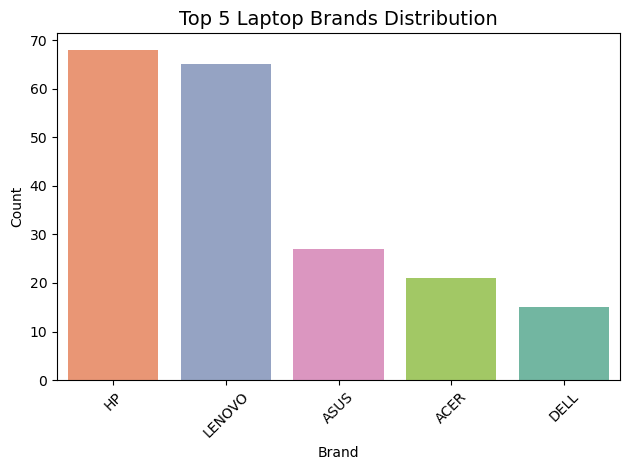

In [68]:
# Top 5 Laptop Brands Distribution
# Filter top 5 brands
top_5_brands = df_a['Laptop_Name'].value_counts().nlargest(5).index
df_top5 = df_a[df_a['Laptop_Name'].isin(top_5_brands)]

# Plot with hue and legend disabled
sns.countplot(data=df_top5, x='Laptop_Name', hue='Laptop_Name', order=top_5_brands, palette='Set2', legend=False)
plt.title('Top 5 Laptop Brands Distribution', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation:
The price distribution reveals a concentration of laptops in the mid-range segment.
A smooth KDE curve highlights the presence of outliers at the higher end, indicating premium models.
This helps distinguish budget, mid-range, and premium pricing clusters.

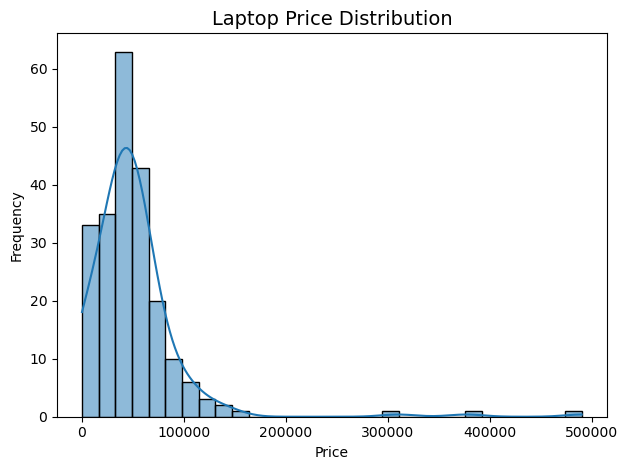

In [69]:
# Laptop Price Distribution
sns.histplot(df_a['Price'], bins=30, kde=True)
plt.title('Laptop Price Distribution', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### Observation:
Lenovo and HP are the most frequent brands, indicating strong market presence.
ASUS and Acer follow closely, while other brands appear less frequently, suggesting niche or budget positioning.

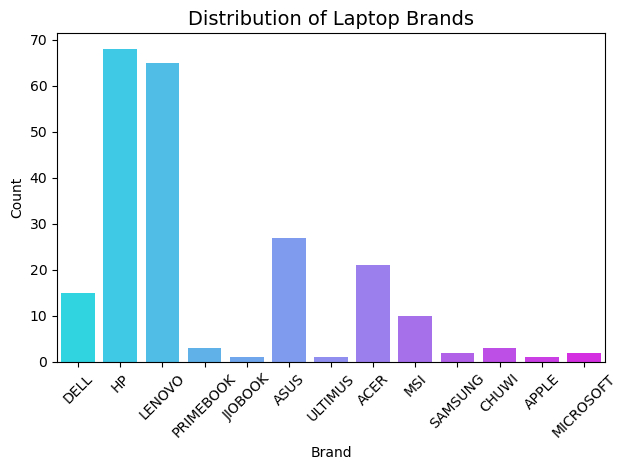

In [71]:
# Distribution of Laptop Brands
sns.countplot(data=df_a, x='Laptop_Name', hue='Laptop_Name', palette='cool', legend=False)
plt.title('Distribution of Laptop Brands', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation:
16GB RAM is the most common configuration, indicating a strong preference for mid-range performance laptops.
8GB RAM is still present, likely in budget models.
capacities like 4GB and above are less frequent, suggesting they cater to premium or specialized use cases.

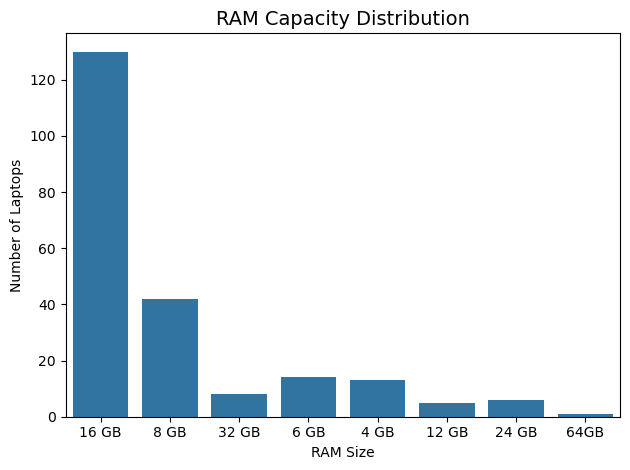

In [72]:
# RAM Capacity Distribution
sns.countplot(data=df_a, x='Ram', color='tab:blue')
plt.title('RAM Capacity Distribution', fontsize=14)
plt.xlabel('RAM Size')
plt.ylabel('Number of Laptops')
plt.tight_layout()
plt.show()

#### Observation:
Most laptops have ratings clustered between 3.5 and 4.5, indicating generally positive user feedback.
The KDE curve shows a smooth peak around 4.0, suggesting this is the most common rating.
Very low and very high ratings are rare, highlighting limited dissatisfaction and few exceptional cases.

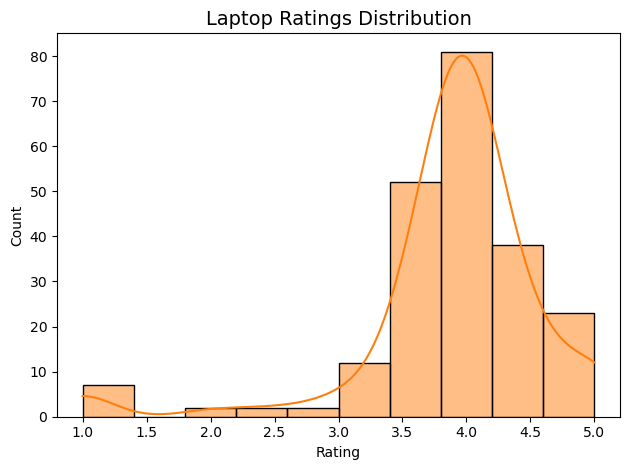

In [73]:
# Rating Distribution
sns.histplot(df_a['Rating'], bins=10, kde=True, color='tab:orange')
plt.title('Laptop Ratings Distribution', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Bivariate Analysis

#### Observation:
Premium brands like Apple and Microsoft show higher average prices, reflecting their positioning in the high-end market.
HP, Lenovo,Dell and ASUS offer more affordable options, indicating a focus on budget and mid-range segments.

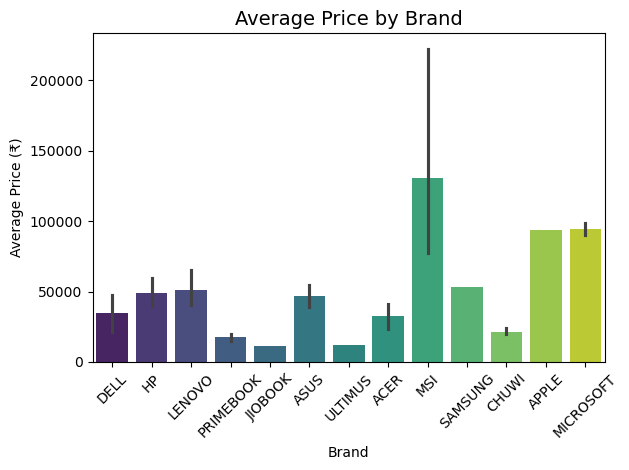

In [75]:
# Average Price by Brand
sns.barplot(data=df_a, x='Laptop_Name', y='Price', hue='Laptop_Name',
            estimator='mean', palette='viridis', dodge=False, legend=False)
plt.title('Average Price by Brand', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observation:
Laptops with higher RAM, especially 16GB and above, show significantly higher price ranges.
The boxplot reveals a clear upward trend in pricing with increased RAM capacity.
This suggests that RAM size is a strong indicator of performance tier and market positioning.

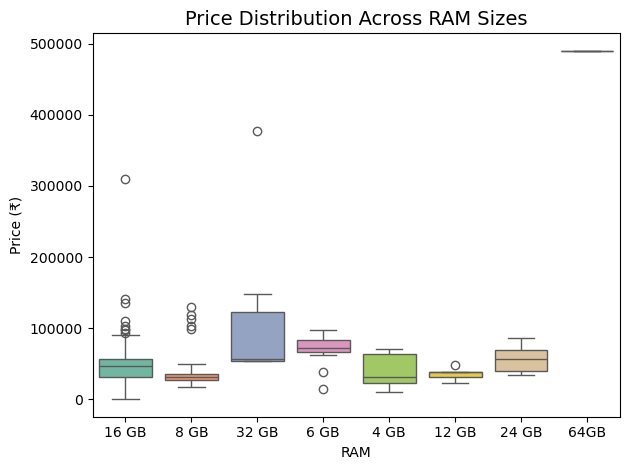

In [76]:
# Price Distribution Across RAM Sizes
sns.boxplot(data=df_a, x='Ram', y='Price', hue='Ram', palette='Set2', dodge=False, legend=False)
plt.title('Price Distribution Across RAM Sizes', fontsize=14)
plt.xlabel('RAM')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()


#### Observation:
Intel Core i7 and Intel Core i9 laptops show significantly higher price ranges, reflecting their high-performance capabilities.
Entry-level processors like Intel Core i3 and AMD Ryzen 3 are associated with lower-priced models.
The boxplot highlights how processor type directly influences laptop pricing and market segmentation.

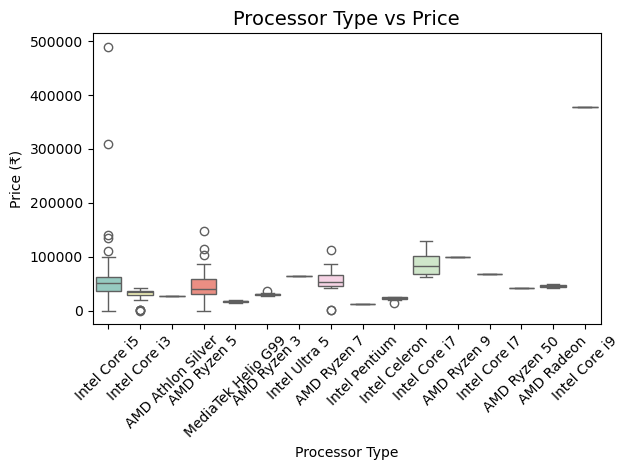

In [77]:
# Processor Type vs Price
sns.boxplot(data=df_a, x='Core', y='Price', hue='Core', palette='Set3', dodge=False, legend=False)
plt.title('Processor Type vs Price', fontsize=14)
plt.xlabel('Processor Type')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observation:
Ratings remain consistently high across all price ranges, indicating that even budget laptops receive positive user feedback.
This suggests that user satisfaction is not solely dependent on price, and lower-cost models can still deliver good value.
Premium laptops tend to cluster at higher price points, but their ratings are not significantly higher than mid-range options.

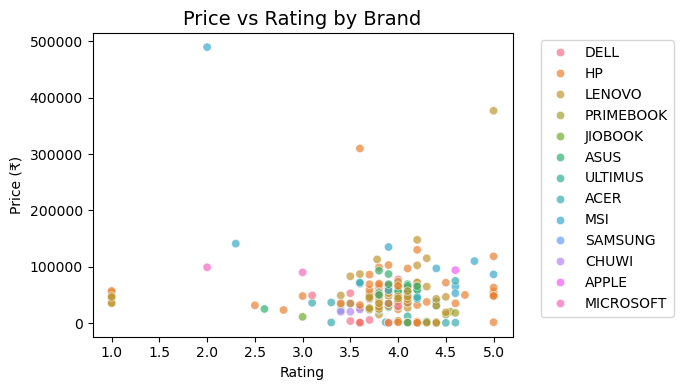

In [78]:
# Price vs Rating by Brand
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_a, x='Rating', y='Price', hue='Laptop_Name', alpha=0.7)
plt.title('Price vs Rating by Brand', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### MultiVariate Analysis

#### Observation:
16GB RAM models are consistently more expensive across all top brands.
Lenovo and HP show wider price gaps between RAM tiers, while ASUS and Lenovo maintain tighter pricing.

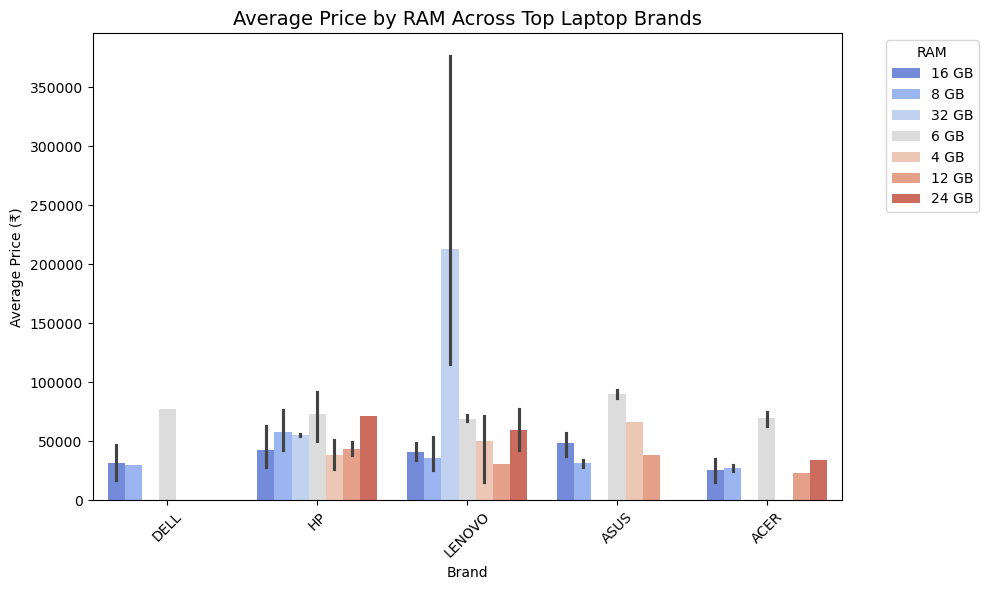

In [80]:
# Average Price by RAM Across Top Laptop Brands

# Filter top 5 brands
top_brands = df_a['Laptop_Name'].value_counts().nlargest(5).index
df_top = df_a[df_a['Laptop_Name'].isin(top_brands)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top, x='Laptop_Name', y='Price', hue='Ram', estimator='mean', palette='coolwarm')
plt.title('Average Price by RAM Across Top Laptop Brands', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.legend(title='RAM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observation from Correlation Heatmap
- Display Size shows the strongest positive correlation with Price (0.30), indicating that larger-screen laptops tend to be more expensive.
- Weight also has a mild positive correlation with both Display Size (0.34) and Price (0.13), suggesting that bigger laptops are heavier and slightly costlier.
- Rating has a very weak negative correlation with Price (-0.07), meaning user satisfaction does not strongly depend on how expensive the laptop is.
- Overall, physical attributes like screen size and weight influence price more than user ratings


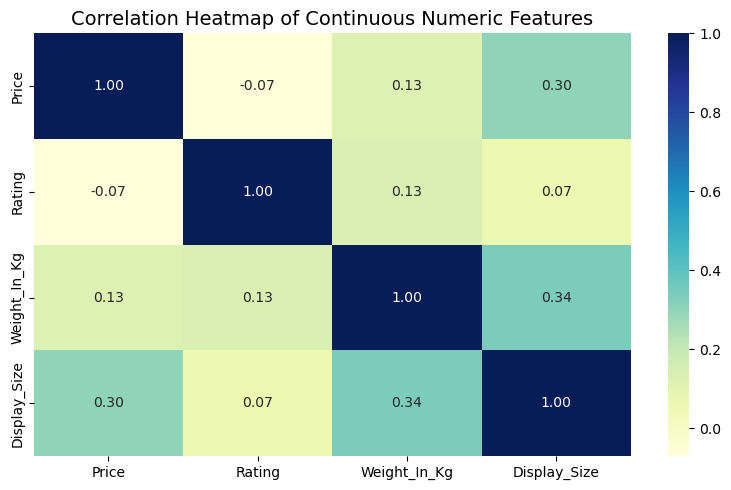

In [82]:
# Correlation Heatmap of Continuous Numeric Features
plt.figure(figsize=(8, 5))
numeric_cols = ['Price', 'Rating', 'Weight_In_Kg', 'Display_Size']
sns.heatmap(df_a[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Continuous Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()


#### Observation:
- Price vs Display Size shows a moderate positive trend, confirming that larger screens are generally associated with higher prices.
- Price vs Weight reveals a slight upward pattern, suggesting that heavier laptops (often larger or more feature-rich) may cost more.
- Rating vs Price appears scattered, indicating that user satisfaction is not strongly tied to price.
- Weight vs Display Size shows a strong positive relationship, meaning bigger screens tend to come with heavier builds.
#### The diagonal KDE plots highlight:
- Price is right-skewed, with most laptops in the mid-range and a few expensive outliers.
- Rating is tightly clustered around 4.0, showing consistent user satisfaction.
- Weight and Display Size have wider distributions, reflecting diverse form factors.



<Figure size 1000x800 with 0 Axes>

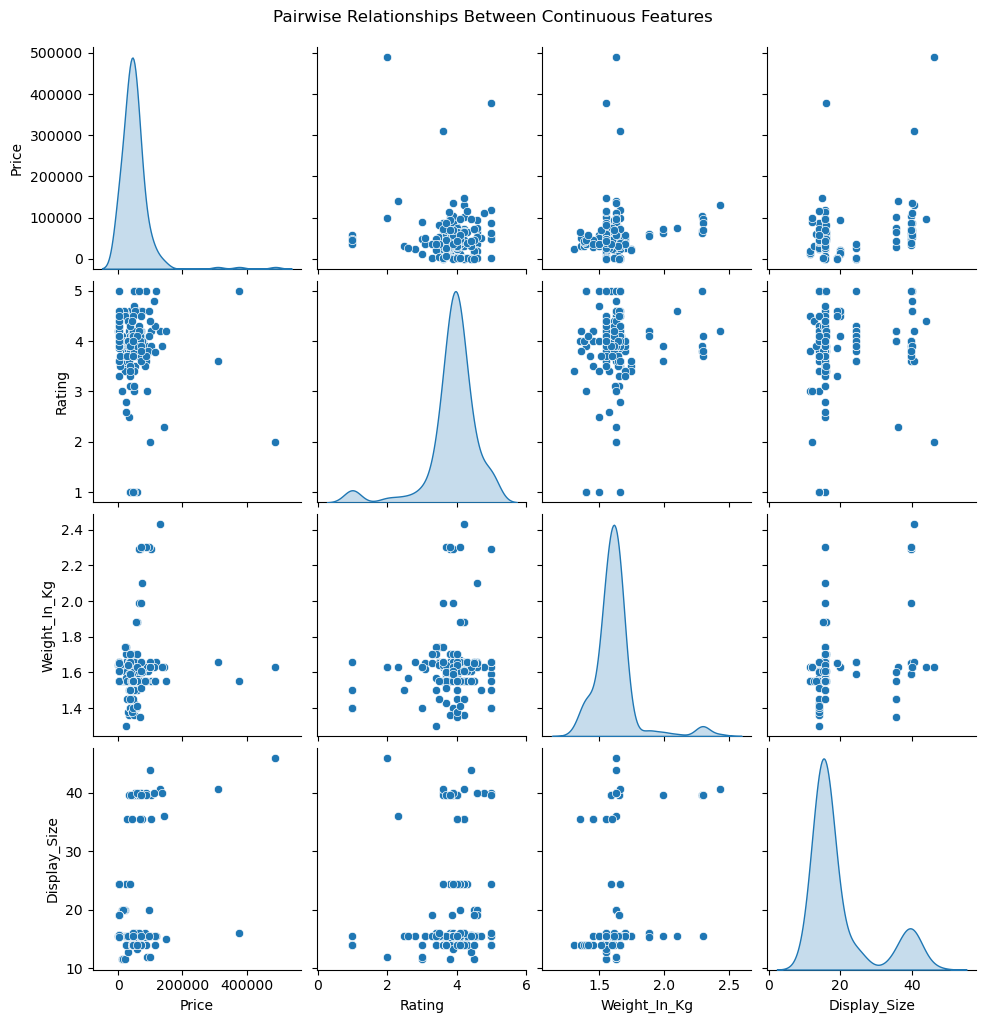

In [83]:
# Pairplot of Continuous Numeric Features

plt.figure(figsize=(10, 8))
sns.pairplot(df_a[['Price', 'Rating', 'Weight_In_Kg', 'Display_Size']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Continuous Features', y=1.02)
plt.show()

#### Summary of Key Insights
- Larger display size and higher RAM are positively correlated with price.
- User ratings remain consistently high across price ranges, showing good value in budget models.
- Intel Core i7 and Intel Core i9 laptops are priced higher, reflecting performance tiers.
- Top brands like Lenovo and HP offer a wide price range, while ASUS and Dell focus on mid-range.

#### Business Implications
- Brands can optimize pricing strategies by aligning RAM and display size with target segments.
- Budget laptops with high ratings present strong value propositions for cost-conscious buyers.
- Retailers can highlight performance specs (RAM, processor) to justify premium pricing.